In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
import sys #Tengo que importarlo para poder traer funciones de dentro de utils, sino solo me dejaba metiendo los archivos.py en la carpeta notebooks
sys.path.append("c:/Users/Guillermo/BOOTCAMP/guillermo_castillon_EDA/src/utils")
from limpieza import limpieza

In [3]:
netflix = pd.read_csv('../data/netflix_titles_nuevo.csv')
amazon = pd.read_csv('../data/amazon_titles_nuevo.csv')
hbo = pd.read_csv('../data/hbo_titles.csv')
imdb_top_movies = pd.read_csv('../data/imdb_top_250_movies.csv', encoding='latin1')
imdb_top_tv = pd.read_csv('../data/imdb_Top_250_TV_Shows.csv')
mis_calificaciones = pd.read_csv('../data/mis_calificaciones_imdb.csv')

### Reglas De Limpieza
1. Eliminar filas con nulos en la columna "title"
2. Eliminar duplicados 
3. Drop de la columna imbdId
4. Eliminar filas con mas de 2 nulos
5. Eliminar filas con nulos en "genres"
6. rellenado de nulos en ratings y numero de votos con medias, desviaciones tipicas y valores aleatorios basados en ambas
7. Revisar limpieza y recorregir

In [4]:
limpiador=limpieza()

In [5]:
amazon_limpio=limpiador.limpiar_dataset(df=amazon)
hbo_limpio=limpiador.limpiar_dataset(df=hbo)
netflix_limpio=limpiador.limpiar_dataset(df=netflix)

In [6]:
mis_calificaciones = mis_calificaciones.drop(columns=["Const", "Title", "URL", "Title Type", "Release Date"])
mis_calificaciones = mis_calificaciones.dropna(subset=["Directors"])

### Tabla de valoracion de variables para los datasets de contenido de las plataformas: netflix,amazon y hbo

|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|title|Nombre del contenido|Categórica|0|Es esencial para identificar el contenido|
|type|Indica si es película o serie|Binaria|1|Util para separar en Datasets y hacer analisis de series y peliculas|
|genres|Géneros asociados al contenido|Categórica|0|Es clave para analizar preferencias|
|releaseYear|Año de lanzamiento|Numérica/Categorizable|1|Puede agruparse por décadas o rangos|
|imdbId|Identificador único de IMDb|Categórica|-|No es necesario para análisis directos (ELIMINADA)|
|imdbAverageRating|Calificación promedio en IMDb|Numérica|0|Esencial para evaluar calidad del contenido|
|imdbNumVotes|Número de votos en IMDb|Numérica|1|Mayor numero de votos puede implicar mayor fiabilidad del rating|
|availableCountries|Países donde está disponible|Categórica|1|Clave para análisis regionales|


### Tabla de valoracion de variables para el dataset de mejores peliculas de IMDB: imdb_top_movies
|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Title|Nombre de la película|Categórica|0|Es esencial para identificar el contenido|
|Release_year|Año de lanzamiento|Numérica/Categorizable|1|Puede agruparse por décadas o rangos|
|Duration|Duración en formato texto|Categorizable|-|Puede usarse `Duration_in_minutes` directamente|
|Duration_in_minutes|Duración en minutos|Numérica|1|Relevante para análisis de patrones de duración|
|Rating|Calificación promedio en IMDb|Numérica|0|Esencial para evaluar calidad del contenido|
|Content_rating|Clasificación por edad|Categórica|2|No tengo claro que tenga uso dentro de mi narrativa|
|No_of_votes|Número de votos (texto)|Categorizable|-|No es útil porque tenemos `No_of_votes_numeric`|
|No_of_votes_numeric|Número de votos en IMDb|Numérica|1|Mayor numero de votos puede implicar mayor fiabilidad del rating|


### Tabla de valoracion de variables para el dataset de mejores series de IMDB: imdb_top_tv
|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Shows Name|Nombre de la serie|Categórica|0|Es esencial para identificar el contenido (debería cambiar nombre a "Title" para facilitar el escalado del analisis)|
|Release Year|Año de lanzamiento|Numérica/Categorizable|1|Puede agruparse por décadas o rangos|
|Episodes|Número de episodios|Numérica|2|Puede ser interesante pero no es esencial|
|Rating|Calificación promedio en IMDb|Numérica|0|Esencial para evaluar calidad del contenido|
|Rating given by people|Número de votos (texto)|Categorizable|1|Habría que tratar la columna para convertirla en numerica |


### Tabla de valoracion de variables para el dataset de mis valoraciones en IMDB: mis_calificaciones
|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|Const|Identificador único de IMDb|Categórica|-|No necesario para análisis directos (ELIMINAR)|
|Your Rating|Calificación personal|Numérica|0|Clave para analizar preferencias personales|
|Date Rated|Fecha en que se realizó la calificación|Categorizable|3|No espero darle uso teniendo en cuenta el objetivo del EDA|
|Title|Nombre del contenido en Español|Categórica|0|Los titulos en español no me permiten relacionar con los otros datasets (ELIMINAR)|
|Original Title|Nombre original del contenido|Categórica|0|Es esencial para identificar el contenido|
|URL|Enlace al contenido|Categórica|-|No relevante para análisis (ELIMINAR)|
|Title Type|Solo he valorado peliculas no tiene interes|Binaria|-|No cumple una función al ser todas peliculas (ELIMINAR)|
|IMDb Rating|Calificación promedio en IMDb|Numérica|1|Permite comparar con calificaciones personales facilmente en el mismo dataset|
|Runtime (mins)|Duración en minutos|Numérica|2|Útil para análisis secundarios|
|Year|Año de lanzamiento|Numérica/Categorizable|1|Puede agruparse por décadas o rangos|
|Genres|Géneros del contenido|Categórica|0|Esencial para analizar preferencias|
|Num Votes|Número de votos en IMDb|Numérica|1|Mayor numero de votos puede implicar mayor fiabilidad del rating|
|Release Date|Fecha de estreno|Categorizable|-|Prefiero utilizar las variable `year` (ELIMINAR)|
|Directors|Directores del contenido|Categórica|3|Debido a que solo esta presente en este dataset no se le puede sacar jugo interesante para revisiones del proyecto|

##### ANALISIS BIVARIANTES SOLO DATASETS PLATAFORMAS

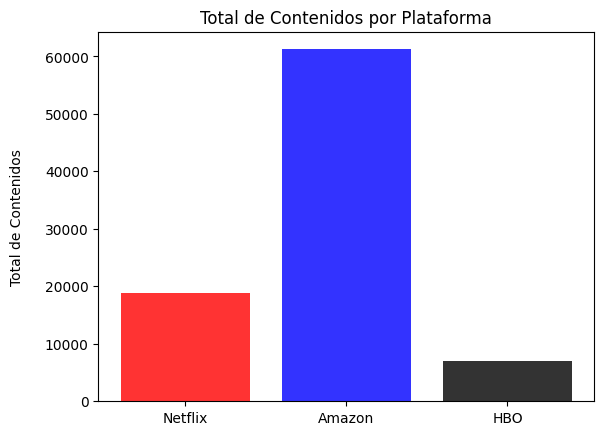

In [7]:
#Total contenidos por plataforma

total_netflix = len(netflix_limpio)
total_amazon = len(amazon_limpio)
total_hbo = len(hbo_limpio)

contenido_totales_df = pd.DataFrame({
    "Plataforma": ["Netflix", "Amazon", "HBO"],
    "Total Contenidos": [total_netflix, total_amazon, total_hbo]
})

plt.bar(
    contenido_totales_df["Plataforma"], 
    contenido_totales_df["Total Contenidos"], 
    color=["red", "blue", "black"], 
    alpha=0.8
)
plt.title("Total de Contenidos por Plataforma")
plt.ylabel("Total de Contenidos", labelpad=15) #Con labelpad conseguí que el label de y no estuviera tan pegado al eje
plt.savefig("../img/total_contenidos_por_plataforma.png",bbox_inches="tight") #Con bbox_inches conseguí que el label que desplace no se saliera de la figura

Text(0.5, 1.0, 'Calificación Promedio IMDb por Plataforma')

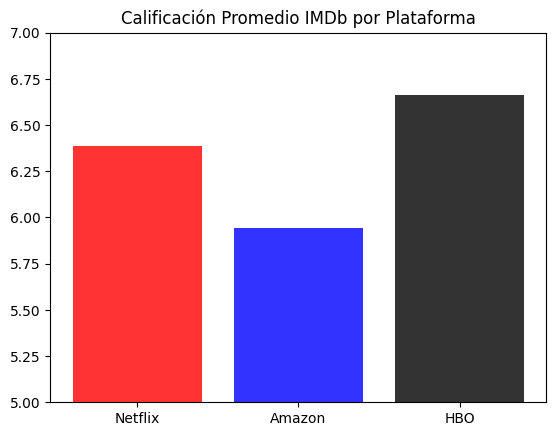

In [8]:
# Promedio de calidad por plataforma con base en las valoraciones de imdb

avg_rating_netflix = netflix_limpio["imdbAverageRating"].mean()
avg_rating_amazon = amazon_limpio["imdbAverageRating"].mean()
avg_rating_hbo = hbo_limpio["imdbAverageRating"].mean()

rating_promedio_df = pd.DataFrame({
    "Plataforma": ["Netflix", "Amazon", "HBO"],
    "Calificación Promedio IMDb": [avg_rating_netflix, avg_rating_amazon, avg_rating_hbo]
})

fig, ax = plt.subplots()
ax.bar(
    rating_promedio_df["Plataforma"], 
    rating_promedio_df["Calificación Promedio IMDb"], 
    color=["red", "blue", "black"], 
    alpha=0.8
)
ax.set_ylim(5, 7)
ax.set_title("Calificación Promedio IMDb por Plataforma")

In [9]:
fig.savefig("../img/calificacion_promedio_imdb_por_plataforma.png")

In [10]:
#Funcion para hacer graficos pie de la distribucion Peliculas\Series por plataforma

def pintar_graficos_pie(dataframes, titulos, path_guardar_img):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    for i in range(3):
        proporciones = dataframes[i]["type"].value_counts(normalize=True)
        axes[i].pie(
            proporciones,
            labels=None,
            autopct="%1.0f%%", #Esto es para que salgan los porcentajes en los graficos
            colors=["yellow", "yellowgreen"],
            startangle=90,
            textprops={'fontsize': 17}
        )
        axes[i].set_title(titulos[i], fontsize=25)
    
    fig.legend(
        labels=["Películas", "Series"],
        loc="lower center",
        ncol=2,
        fontsize=15 #Pongo leyenda y arriba quito que salgan los labels (labels=None) en cada grafico para que quede mas limpio
    )
    
    plt.tight_layout()
    fig.savefig(path_guardar_img, bbox_inches="tight")
    plt.show()

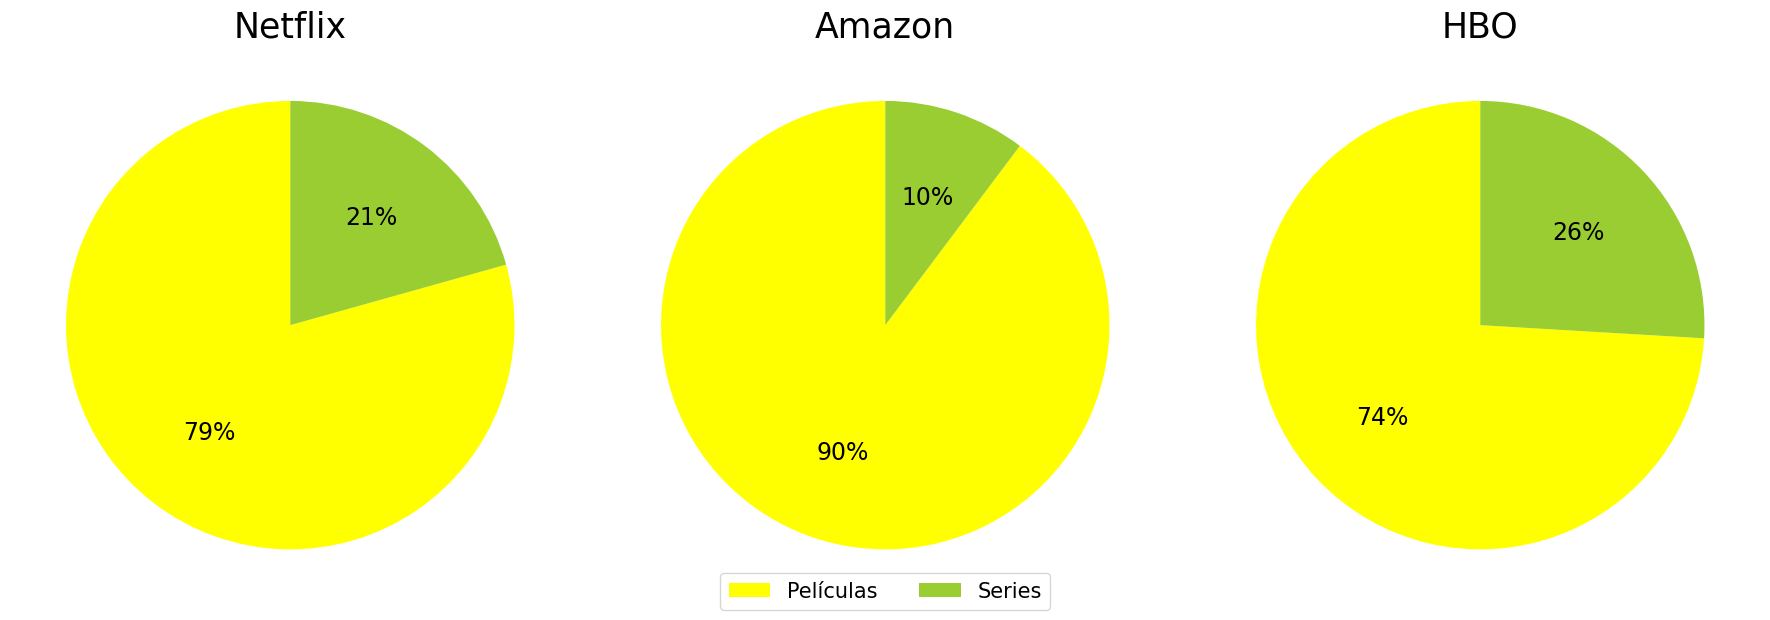

In [11]:
#Ejecuto la función

pintar_graficos_pie(
    dataframes=[netflix_limpio, amazon_limpio, hbo_limpio],
    titulos=["Netflix", "Amazon", "HBO"],
    path_guardar_img="../img/proporcion_series_peliculas.png"
)

##### ANALISIS MULTIVARIANTE SOLO DATASETS PLATAFORMAS

In [12]:
# Función para ver a traves de las funciones de densidad la "Distribución de Ratings IMDB por Género y Plataforma" (poner en diapositiva lo entrecomillado)

def graficar_densidad_generos(dataframes, generos, path_guardar_img):
    plataformas = ["Netflix", "Amazon", "HBO"]
    colores = ["red", "blue", "black"]
    
    fig, axes = plt.subplots(1, len(generos), figsize=(18, 6), sharey=True)
    
    for i, genero in enumerate(generos):
        for df, plataforma, color in zip(dataframes, plataformas, colores):
            df_genero = df[df["genres"].str.contains(genero)]
            sns.kdeplot(
                data=df_genero,
                x="imdbAverageRating",
                ax=axes[i],
                label=plataforma,
                color=color,
                fill=True,
                alpha=0.5
            )
        axes[i].set_title(genero, fontsize=21)
        axes[i].set_xlabel("Rating IMDb")
        axes[i].set_ylabel("")
    
    fig.legend(
        plataformas,
        loc="lower center",
        ncol=3,
        fontsize=15
    )
    plt.tight_layout(rect=[0, 0.1, 1, 0.95])
    fig.savefig(path_guardar_img, bbox_inches="tight")
    plt.show()

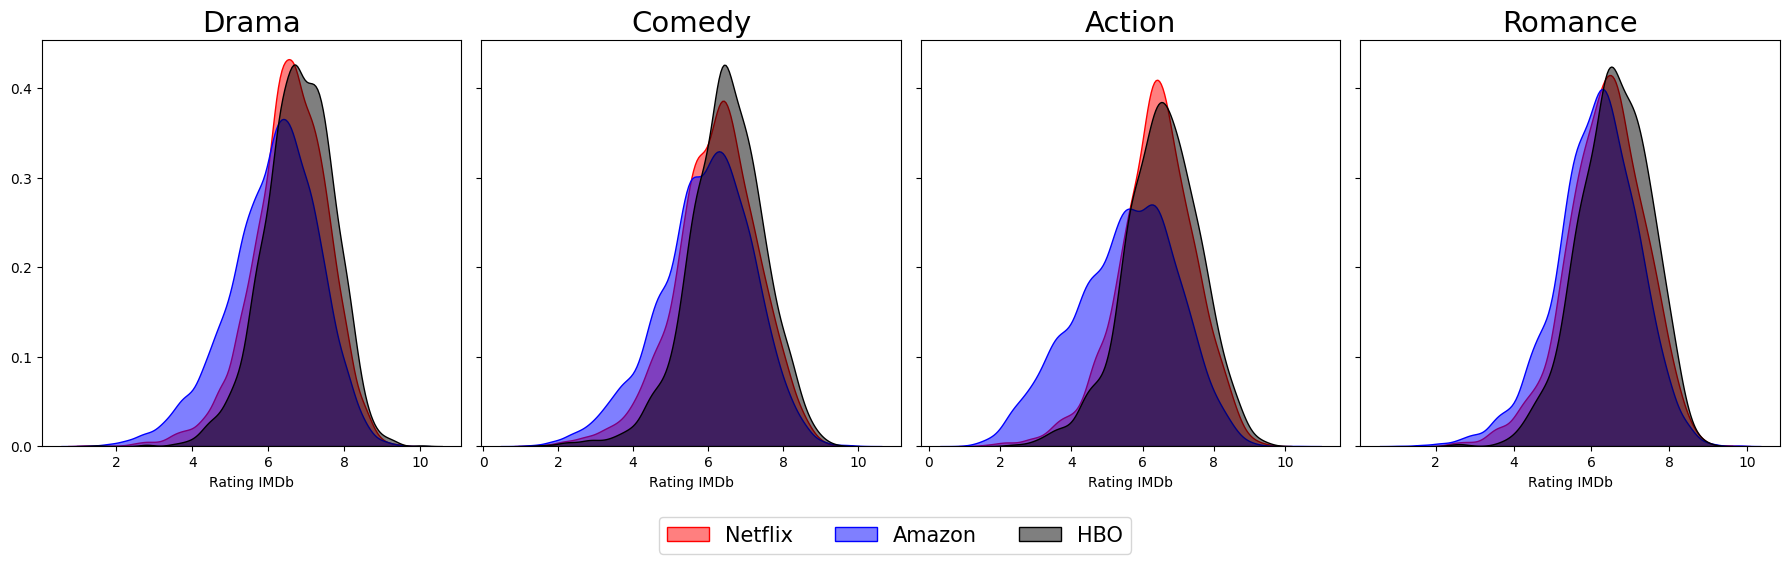

In [13]:
graficar_densidad_generos(
    dataframes=[netflix_limpio, amazon_limpio, hbo_limpio],
    generos=["Drama", "Comedy", "Action", "Romance"],
    path_guardar_img="../img/densidad_generosA_rating.png"
)


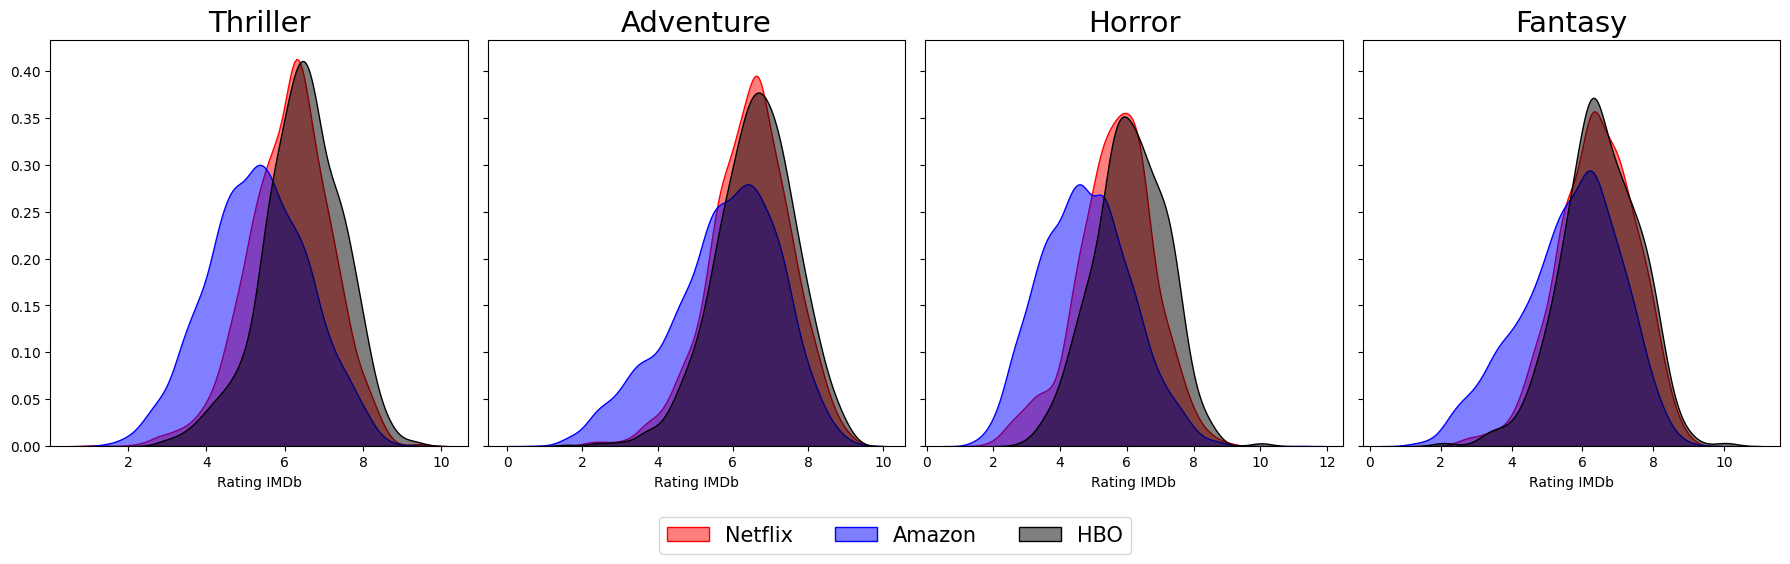

In [14]:
graficar_densidad_generos(
    dataframes=[netflix_limpio, amazon_limpio, hbo_limpio],
    generos=["Thriller", "Adventure", "Horror", "Fantasy"],
    path_guardar_img="../img/densidad_generosB_rating_prueba.png"
)


In [15]:
#Graficos de barras para mostrar la cantidad de peliculas por genero que tiene cada plataforma

def graficar_cantidad_por_genero(dataframes, generos, path_guardar_img):
    plataformas = ["Netflix", "Amazon", "HBO"]
    colores = ["red", "blue", "black"]
    
    datos_genero = []
    for df, plataforma in zip(dataframes, plataformas):
        for genero in generos:
            df_genero = df[df["genres"].str.contains(genero)]
            total = len(df_genero)
            datos_genero.append({"Plataforma": plataforma, "Género": genero, "Cantidad": total})
    df_final = pd.DataFrame(datos_genero)
    
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.barplot(
        data=df_final, 
        x="Género", 
        y="Cantidad", 
        hue="Plataforma", 
        palette=colores, 
        ax=ax,
        alpha=0.8
    )

    ax.set_title("Cantidad de Títulos por Género y Plataforma", fontsize=16)
    ax.legend(title="Plataforma")
    fig.savefig(path_guardar_img, bbox_inches="tight")
    plt.show()

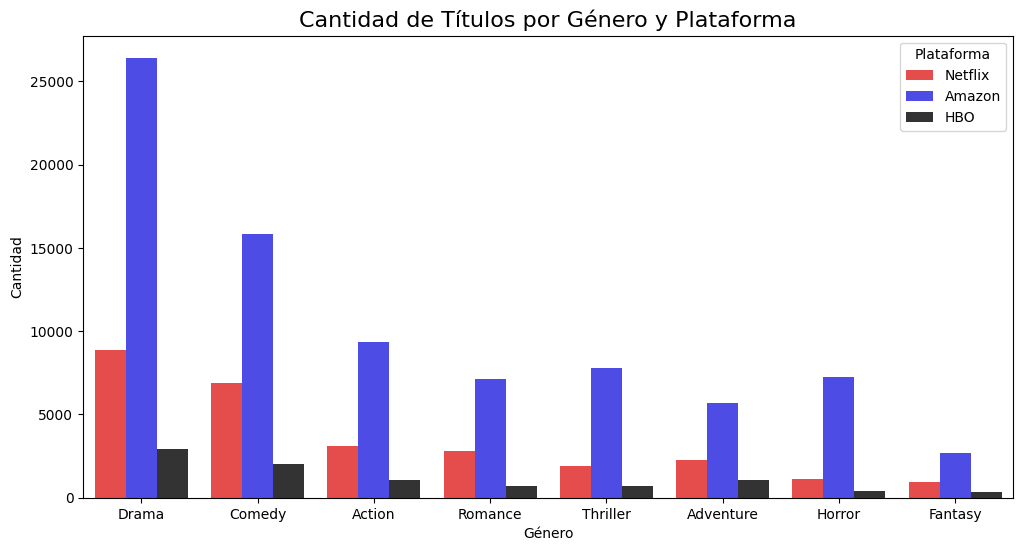

In [16]:
graficar_cantidad_por_genero(
    dataframes=[netflix_limpio, amazon_limpio, hbo_limpio],
    generos=["Drama", "Comedy", "Action", "Romance", "Thriller", "Adventure", "Horror", "Fantasy"],
    path_guardar_img="../img/cantidad_por_genero.png"
)

##### ANALISIS BIVARIANTE DATASETS PLATAFORMAS + DATASETS TOPS

In [17]:
diccionario_plataformas = {
    "Netflix": netflix_limpio,
    "Amazon Prime Video": amazon_limpio,
    "HBO": hbo_limpio
}

In [18]:
#Función para añadir columnas booleanas a los dataframes para 
def agregar_columnas_booleanas(df_base,col_titulo, diccionario_plataformas):
    df_con_plataformas = df_base.copy()
    for plataforma, df_plataforma in diccionario_plataformas.items():
        df_con_plataformas[plataforma] = df_con_plataformas[col_titulo].isin(df_plataforma["title"])
    return df_con_plataformas

In [19]:
imdb_top_movies_bool = agregar_columnas_booleanas(imdb_top_movies,"Title", diccionario_plataformas)
imdb_top_series_bool = agregar_columnas_booleanas(imdb_top_tv,"Shows Name", diccionario_plataformas)

In [20]:
#Mi objetivo con esta funcion es que me haga dos graficos sobre el numero de pelis y el numero de series del top[x] de imdb que hay en cada plataforma
#  Y despues un cuadro resumen de los datos para verlos, mi objetivo es poderle pasar no solo el top250 sino tambien el top 20 top 50 o el que yo quiera.

def graficar_y_resumir_top(imdb_movies_bool, imdb_series_bool, path_img_movies, path_img_series):
    conteos_peliculas = imdb_movies_bool[["Netflix", "Amazon Prime Video", "HBO"]].sum() #Grafico Peliculas
    plt.figure(figsize=(8, 6))
    conteos_peliculas.plot(kind="bar", color=["red", "blue", "black"], alpha=0.8)
    plt.title("Cantidad de Películas del Top IMDb en cada Plataforma")
    plt.ylabel("Cantidad de Películas")
    plt.xticks(rotation=0)
    plt.savefig(path_img_movies, bbox_inches="tight")
    plt.show()


    conteos_series = imdb_series_bool[["Netflix", "Amazon Prime Video", "HBO"]].sum() #Grafico Series
    plt.figure(figsize=(8, 6))
    conteos_series.plot(kind="bar", color=["red", "blue", "black"], alpha=0.8)
    plt.title("Cantidad de Series del Top IMDb en cada Plataforma")
    plt.ylabel("Cantidad de Series")
    plt.xticks(rotation=0)
    plt.savefig(path_img_series, bbox_inches="tight")
    plt.show()

    #DataFrame resumen
    df_resumen_top = pd.DataFrame({
        "Películas en Top IMDb": conteos_peliculas,
        "Series en Top IMDb": conteos_series
    })
    
    return df_resumen_top

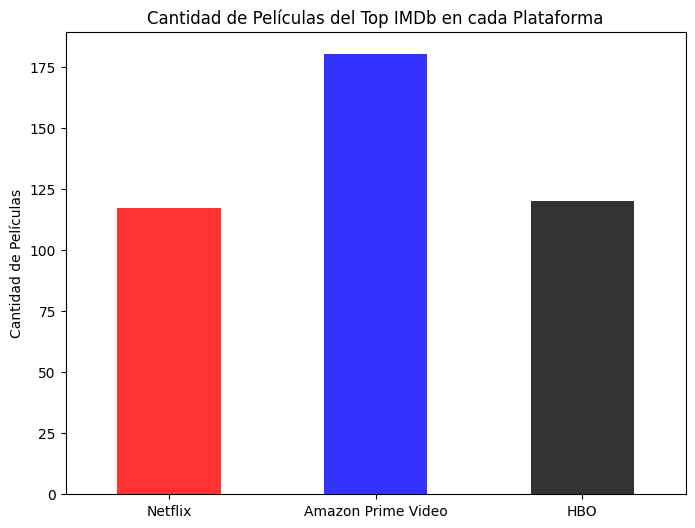

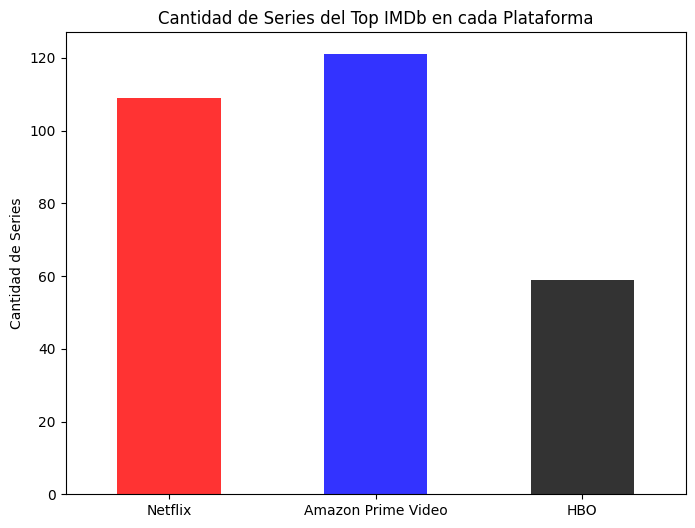

                    Películas en Top IMDb  Series en Top IMDb
Netflix                               117                 109
Amazon Prime Video                    180                 121
HBO                                   120                  59


In [21]:
#Primero para el top 250
df_resumen_top_250 = graficar_y_resumir_top(
    imdb_movies_bool=imdb_top_movies_bool,
    imdb_series_bool=imdb_top_series_bool,
    path_img_movies="../img/cantidad_peliculas_top250_por_plataforma.png",
    path_img_series="../img/cantidad_series_top250_por_plataforma.png"
)

print(df_resumen_top_250)

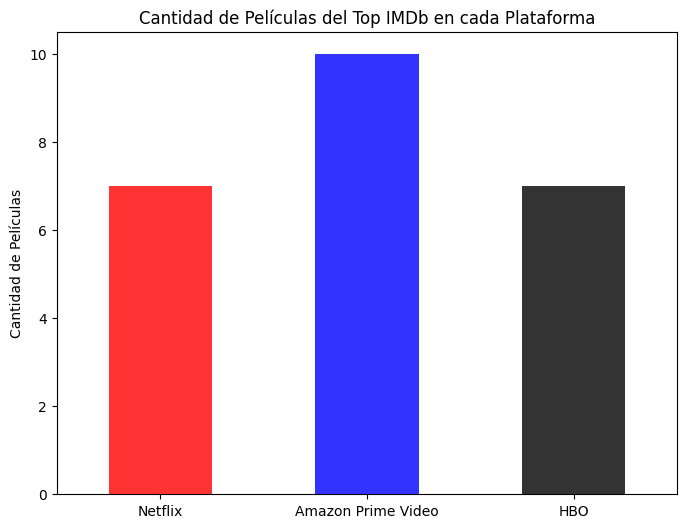

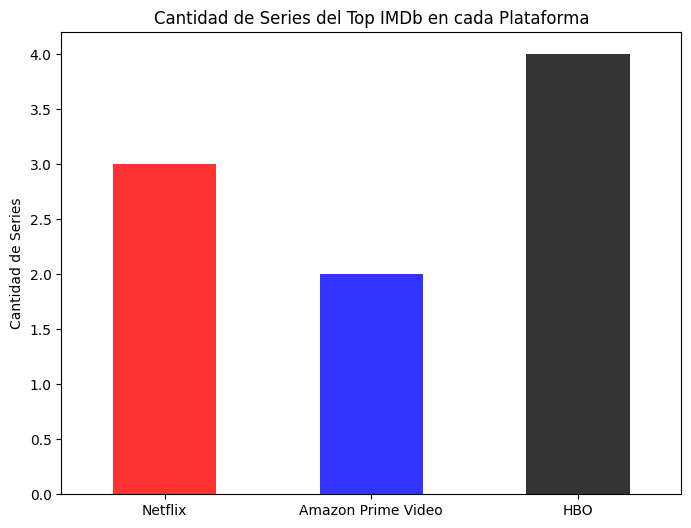

                    Películas en Top IMDb  Series en Top IMDb
Netflix                                 7                   3
Amazon Prime Video                     10                   2
HBO                                     7                   4


In [22]:
# Ahora voy a hacer lo mismo con las 10 mejores películas y series
imdb_top_movies_10 = imdb_top_movies.head(10)
imdb_top_series_10 = imdb_top_tv.head(10)

imdb_top_movies_bool_10 = agregar_columnas_booleanas(imdb_top_movies_10, "Title", diccionario_plataformas) # Creo los DataFrames booleanos para el Top 10
imdb_top_series_bool_10 = agregar_columnas_booleanas(imdb_top_series_10, "Shows Name", diccionario_plataformas)

df_resumen_top_10 = graficar_y_resumir_top( # Llamo a la función para el Top 10
    imdb_movies_bool=imdb_top_movies_bool_10,
    imdb_series_bool=imdb_top_series_bool_10,
    path_img_movies="../img/cantidad_peliculas_top10_por_plataforma.png",
    path_img_series="../img/cantidad_series_top10_por_plataforma.png"
)

print(df_resumen_top_10)

##### ANALISIS MULTIVARIANTES TENIENDO EN CUENTA LAS REGIONES

In [23]:

# Calcular la cantidad de contenidos por región para todas las plataformas
def calcular_cantidad_por_region(diccionario_plataformas):
    resultados = {}
    for plataforma, df_plataforma in diccionario_plataformas.items():
        for regiones in df_plataforma["availableCountries"].dropna():
            for region in regiones.split(","): 
                region = region.strip()  
                if (plataforma, region) not in resultados:
                    resultados[(plataforma, region)] = 0
                resultados[(plataforma, region)] += 1
    filas = []
    for (plataforma, region), cantidad in resultados.items():
        filas.append({"Plataforma": plataforma, "Región": region, "Cantidad": cantidad})
    return pd.DataFrame(filas)


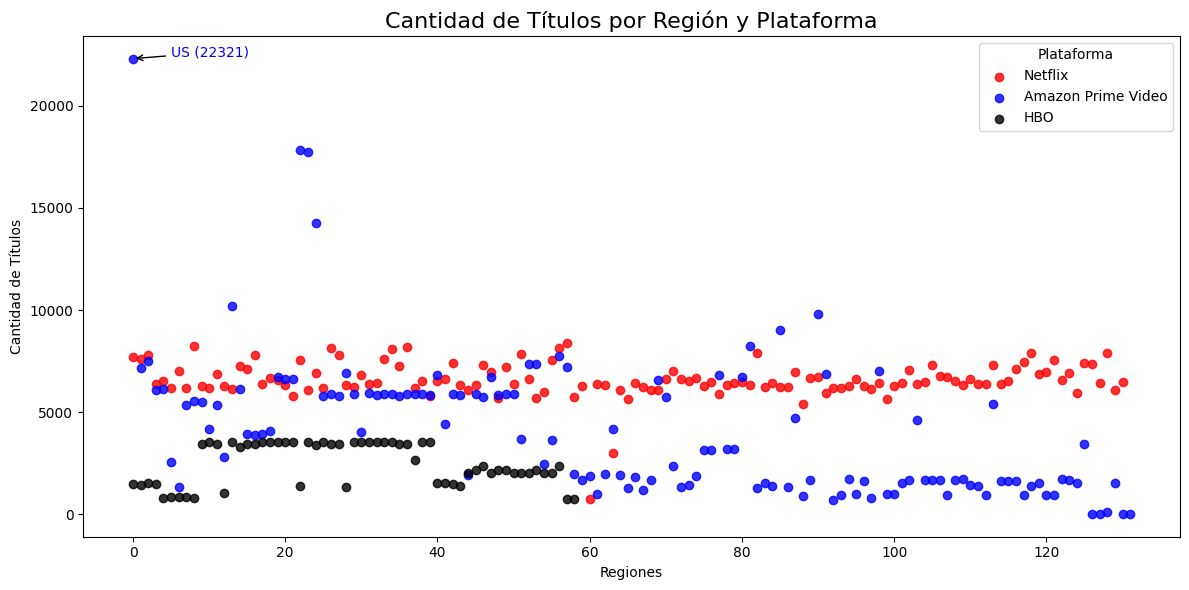

In [24]:
# Uso la función para crear un gráfico de dispersión

df_cantidad_por_region = calcular_cantidad_por_region(diccionario_plataformas)

plt.figure(figsize=(12, 6))

for plataforma, color in zip(["Netflix", "Amazon Prime Video", "HBO"], ["red", "blue", "black"]):
    plataforma_data = df_cantidad_por_region[df_cantidad_por_region["Plataforma"] == plataforma]
    numregiones = range(len(plataforma_data)) #No me caben los nombres de todas las regiones
    plt.scatter(
        numregiones,
        plataforma_data["Cantidad"],
        label=plataforma,
        color=color,
        alpha=0.8
    )
    #Busco el punto mas alto de cantidad de contenidos de amazon que es un outlier en toda regla.
    if plataforma == "Amazon Prime Video":
        amazon_max = plataforma_data.loc[plataforma_data["Cantidad"].idxmax()]
        amazon_index = numregiones[list(plataforma_data["Región"]).index(amazon_max["Región"])]
        plt.annotate(
            text=f"{amazon_max['Región']} ({amazon_max['Cantidad']})",
            xy=(amazon_index, amazon_max["Cantidad"]),
            xytext=(amazon_index + 5, amazon_max["Cantidad"] + 100),
            arrowprops=dict(facecolor='blue', arrowstyle="->"),
            fontsize=10,
            color="blue"
        )
plt.title("Cantidad de Títulos por Región y Plataforma", fontsize=16)
plt.xlabel("Regiones")
plt.ylabel("Cantidad de Títulos")
plt.legend(title="Plataforma")
plt.tight_layout()
plt.savefig("../img/distribucion_titulos_por_region_y_plataforma_con_anotacion.png", bbox_inches="tight")
plt.show()

In [25]:
#Voy a probar ahora con una muestra concreta de regiones con datos diferentes para facilitar la visualizacion de la importancia de la region en la cantidad y probar otro tipo de graficos

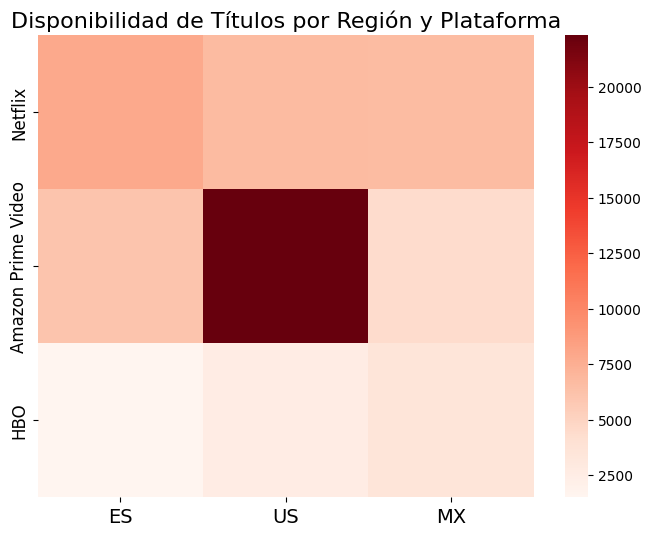

In [68]:
# Calcular la disponibilidad total de peliculas por plataforma para cada region de una muestra concreta, muestra de regiones: Mexico, USA y España

def calcular_disponibilidad_por_region(diccionario_plataformas, regiones):
    resultados = []
    for plataforma, df_plataforma in diccionario_plataformas.items():
        for region in regiones:
            disponibles = df_plataforma["availableCountries"].str.contains(region).sum()
            resultados.append({"Plataforma": plataforma, "Región": region, "Disponibles": disponibles})
    return pd.DataFrame(resultados)

regiones = ["ES", "US", "MX"]
df_disponibilidad = calcular_disponibilidad_por_region(diccionario_plataformas, regiones)
plataformas = df_disponibilidad["Plataforma"].unique()
regiones = df_disponibilidad["Región"].unique()
heatmap_data = []
for plataforma in plataformas:
    fila = []  
    for region in regiones:
        disponibles = df_disponibilidad[(df_disponibilidad["Plataforma"] == plataforma) & (df_disponibilidad["Región"] == region)]["Disponibles"].values[0]
        fila.append(disponibles)
    heatmap_data.append(fila)

plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=False,
    cmap= "Reds",    
    xticklabels=regiones,
    yticklabels=plataformas
)
plt.title("Disponibilidad de Títulos por Región y Plataforma", fontsize=16)
plt.xticks(fontsize=14) 
plt.yticks(fontsize=12)
plt.savefig("../img/heatmap_disponibilidad_por_region.png", bbox_inches="tight")
plt.show()


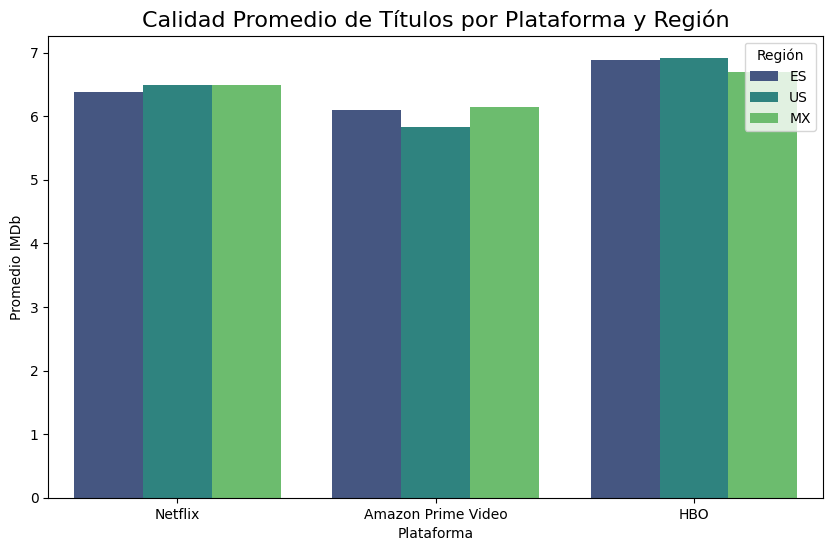

In [27]:
#Funcion para calcular cantidad por región resultados no demasiado ilustrativos 
def calcular_calidad_por_region(diccionario_plataformas, regiones):
    resultados = []
    for plataforma, df_plataforma in diccionario_plataformas.items():
        for region in regiones:
            disponibles = df_plataforma[df_plataforma["availableCountries"].str.contains(region)]
            promedio_rating = disponibles["imdbAverageRating"].mean()
            resultados.append({"Plataforma": plataforma, "Región": region, "Promedio IMDb": promedio_rating})
    return pd.DataFrame(resultados)

regiones = ["ES", "US", "MX"]
df_calidad = calcular_calidad_por_region(diccionario_plataformas, regiones)
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_calidad,
    x="Plataforma",
    y="Promedio IMDb",
    hue="Región", 
    palette="viridis"
)
plt.title("Calidad Promedio de Títulos por Plataforma y Región", fontsize=16)
plt.ylabel("Promedio IMDb")
plt.xticks(rotation=0)
plt.legend(title="Región")
plt.savefig("../img/calidad_por_plataforma_y_region.png", bbox_inches="tight")
plt.show()

##### ANALISIS TENIENDO EN CUENTA SOLO LA REGION ESPAÑOLA 

In [28]:
netflix_españa = netflix_limpio[netflix_limpio["availableCountries"].str.contains("ES", na=False)].copy()
amazon_españa = amazon_limpio[amazon_limpio["availableCountries"].str.contains("ES", na=False)].copy()
hbo_españa = hbo_limpio[hbo_limpio["availableCountries"].str.contains("ES", na=False)].copy()

In [29]:
netflix_españa.to_csv("../data/netflix_españa.csv", index=False)
amazon_españa.to_csv("../data/amazon_españa.csv", index=False)
hbo_españa.to_csv("../data/hbo_españa.csv", index=False)

LITERALMENTE PROCEDO A REPETIR LOS ANALISIS BIVARIANTES COLUMNA-PLATAFORMA PERO AHORA SOLO PARA LA REGIÓN ESPAÑOLA CON LOS SUBDATASETS QUE HE CREADO

In [30]:
#PUEDO MEJORAR ESTO CREANDO FUNCIONES Y ASI SOLO TENDRÍA QUE APLICARLAS A LOS DATASETS MULTIREGIONALES Y AHORA A ESTOS SUBDATASETS

In [31]:
#Incluso podría hacer que en la función eligieras si graficar cantidad o promedio debido a que son el mismo tipo de grafico uno hecho con plt y otro con ax

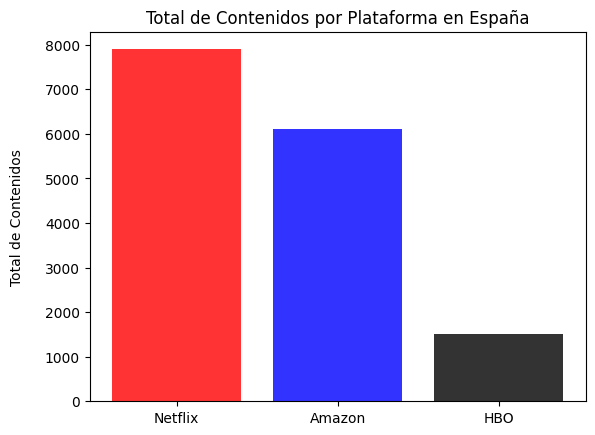

In [32]:
# Total de contenidos por plataforma en España (copia y pega y cambio de nombres con la celda primera del analisis)
total_netflix_españa = len(netflix_españa)
total_amazon_españa = len(amazon_españa)
total_hbo_españa = len(hbo_españa)

contenido_totales_españa_df = pd.DataFrame({
    "Plataforma": ["Netflix", "Amazon", "HBO"],
    "Total Contenidos": [total_netflix_españa, total_amazon_españa, total_hbo_españa]
})

plt.bar(
    contenido_totales_españa_df["Plataforma"], 
    contenido_totales_españa_df["Total Contenidos"], 
    color=["red", "blue", "black"], 
    alpha=0.8
)
plt.title("Total de Contenidos por Plataforma en España")
plt.ylabel("Total de Contenidos", labelpad=15)
plt.savefig("../img/total_contenidos_por_plataforma_españa.png", bbox_inches="tight")
plt.show()

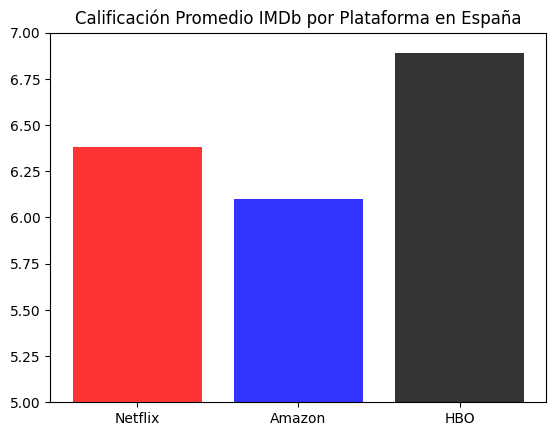

In [33]:
# Promedio de calidad por plataforma en España (copia y pega y cambio de nombres con la celda segunda del analisis)
avg_rating_netflix_españa = netflix_españa["imdbAverageRating"].mean()
avg_rating_amazon_españa = amazon_españa["imdbAverageRating"].mean()
avg_rating_hbo_españa = hbo_españa["imdbAverageRating"].mean()

rating_promedio_españa_df = pd.DataFrame({
    "Plataforma": ["Netflix", "Amazon", "HBO"],
    "Calificación Promedio IMDb": [avg_rating_netflix_españa, avg_rating_amazon_españa, avg_rating_hbo_españa]
})

fig, ax = plt.subplots()
ax.bar(
    rating_promedio_españa_df["Plataforma"], 
    rating_promedio_españa_df["Calificación Promedio IMDb"], 
    color=["red", "blue", "black"], 
    alpha=0.8
)
ax.set_ylim(5, 7)
ax.set_title("Calificación Promedio IMDb por Plataforma en España")
plt.savefig("../img/calificacion_promedio_imdb_por_plataforma_españa.png", bbox_inches="tight")
plt.show()


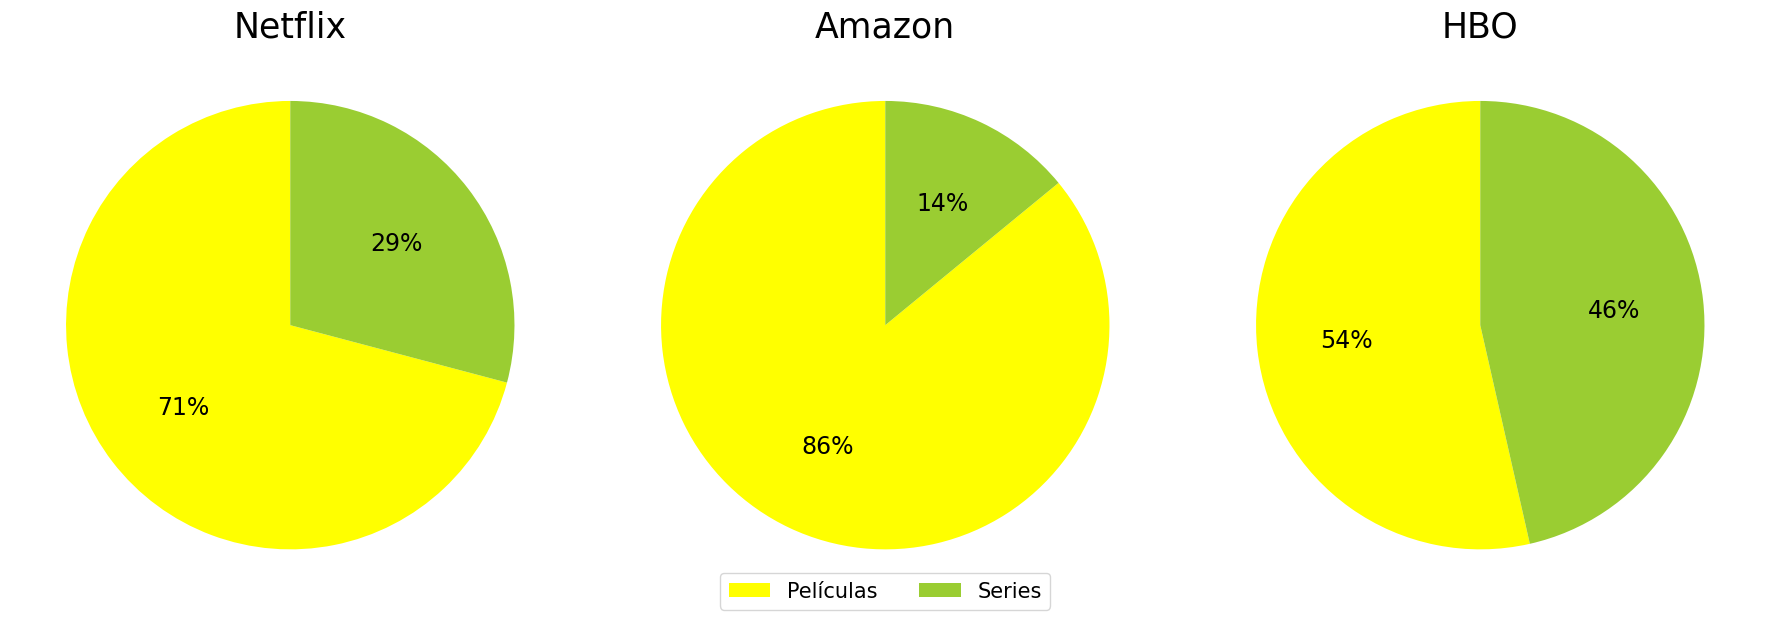

In [34]:
pintar_graficos_pie(
    dataframes=[netflix_españa, amazon_españa, hbo_españa],
    titulos=["Netflix", "Amazon", "HBO"],
    path_guardar_img="../img/españa_proporcion_series_peliculas.png"
)

ANALISIS MULTIVARIANTES REGIÓN ESPAÑOLA

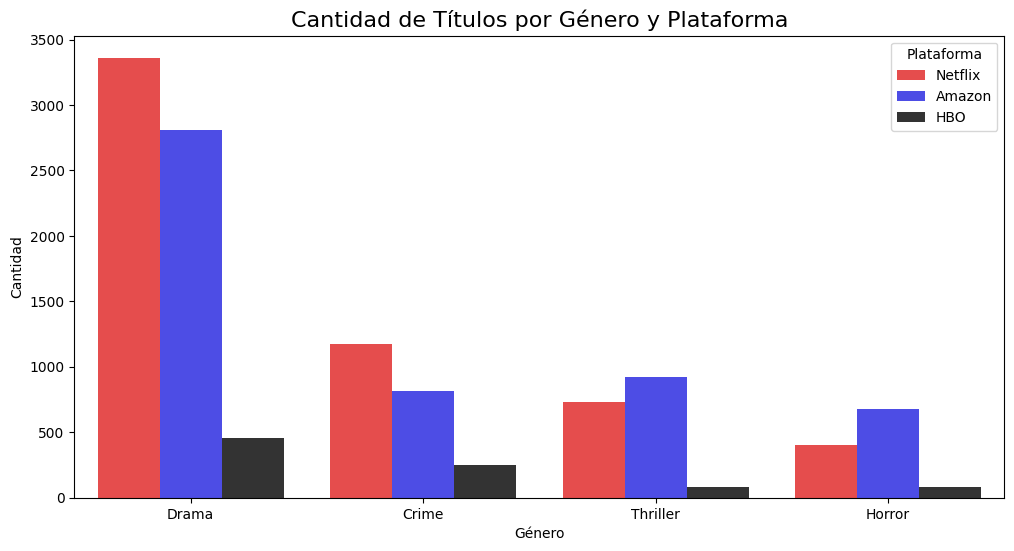

In [35]:
graficar_cantidad_por_genero(
    dataframes=[netflix_españa, amazon_españa, hbo_españa],
    generos=["Drama","Crime","Thriller", "Horror"],
    path_guardar_img="../img/españa_cantidad_por_genero.png"
)

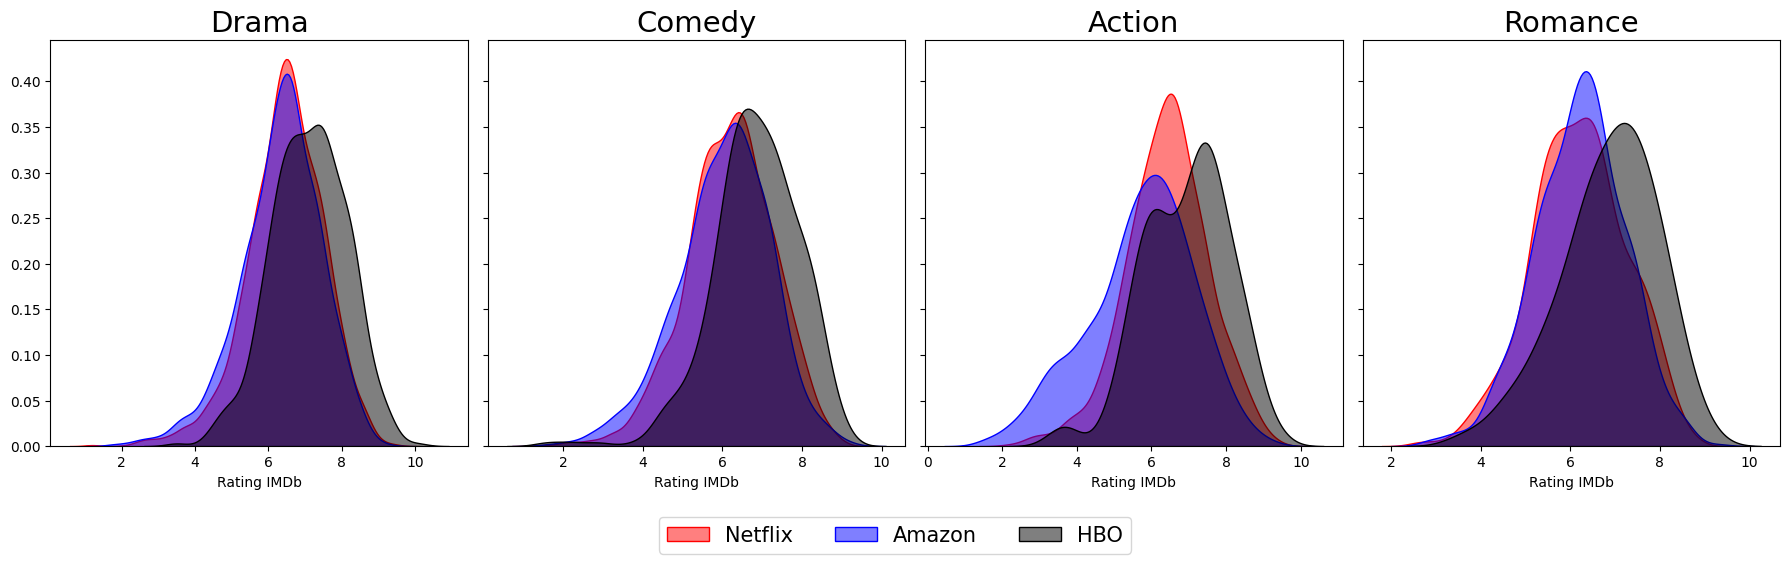

In [36]:
graficar_densidad_generos(
    dataframes=[netflix_españa, amazon_españa, hbo_españa],
    generos=["Drama", "Comedy", "Action", "Romance"],
    path_guardar_img="../img/españa_densidad_generosA_rating.png"
)

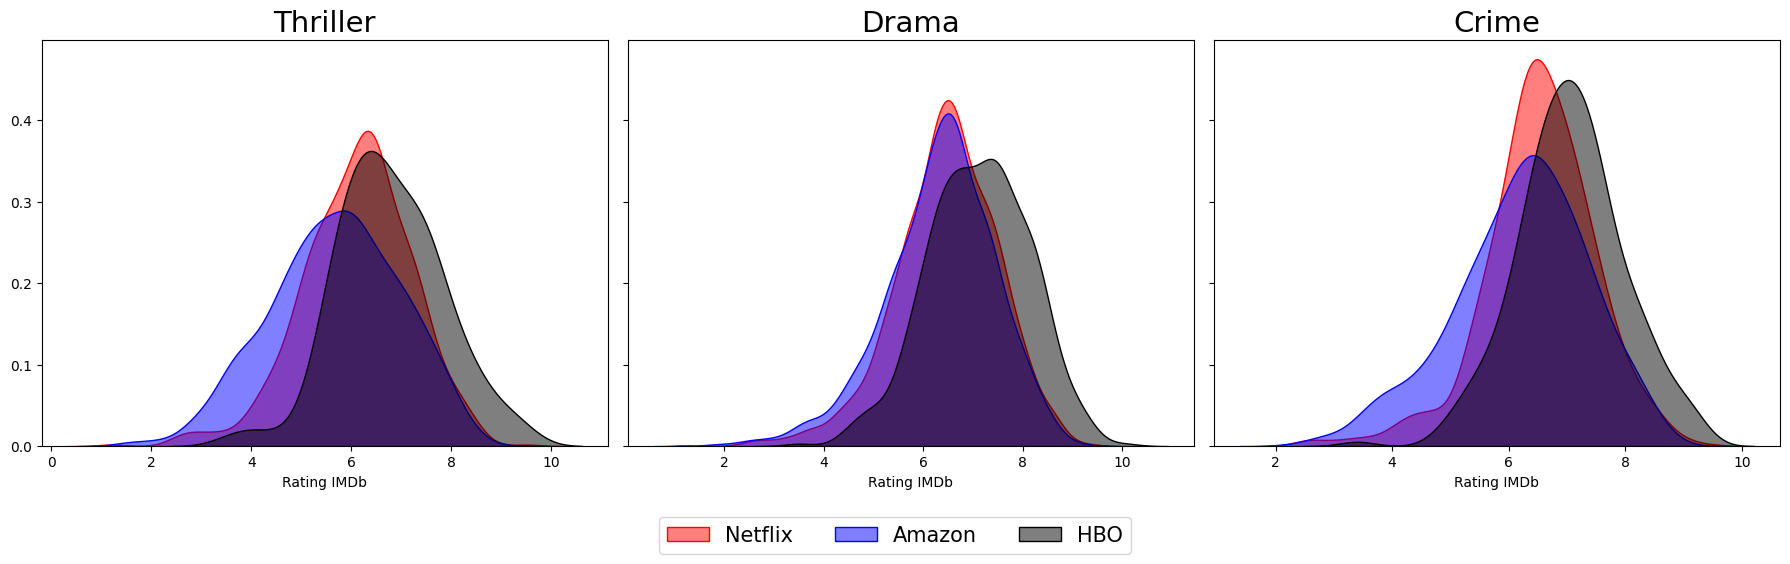

In [37]:
graficar_densidad_generos(
    dataframes=[netflix_españa, amazon_españa, hbo_españa],
    generos=["Thriller", "Drama","Crime"],
    path_guardar_img="../img/españa_densidad_generosB_rating_prueba.png"
)

In [45]:
#Creo una nuevo columna a partir de release year para ver la cantidad de peliculas que tiene cada plataforma en las distintas epocas 
def categorizar_año(row):
    if row < 1990:
        return "Antes de 1990"
    elif 1990 <= row <= 1999:
        return "1990-1999"
    elif 2000 <= row <= 2009:
        return "2000-2009"
    elif 2010 <= row <= 2019:
        return "2010-2019"
    else:
        return "2020-Actualidad"

for df in [netflix_españa, amazon_españa, hbo_españa]:
    df["Categoría Año"] = df["releaseYear"].apply(categorizar_año)

In [54]:
#Me hago un dataframe para poder ver bien la distribucion
netflix_categorias = netflix_españa["Categoría Año"].value_counts()
amazon_categorias = amazon_españa["Categoría Año"].value_counts()
hbo_categorias = hbo_españa["Categoría Año"].value_counts()

df_categorias = pd.concat([netflix_categorias, amazon_categorias, hbo_categorias], axis=1,keys=["Netflix", "Amazon", "HBO"]).T
df_categorias

Categoría Año,2020-Actualidad,2010-2019,2000-2009,Antes de 1990,1990-1999
Netflix,3633,2983,580,509,192
Amazon,1964,2461,702,720,263
HBO,703,518,186,33,67


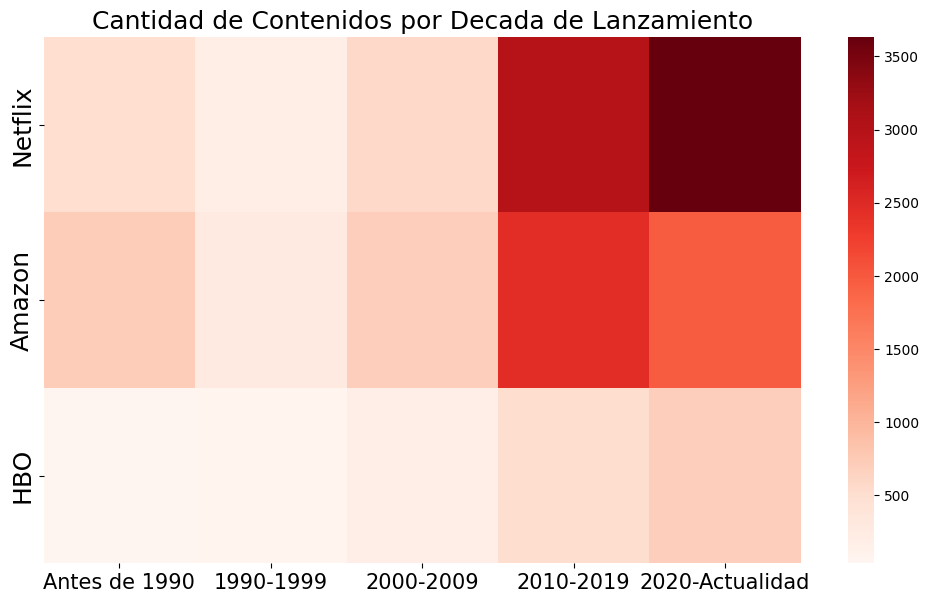

In [95]:
df_categorias = df_categorias[["Antes de 1990", "1990-1999", "2000-2009","2010-2019" ,"2020-Actualidad" ]]

plt.figure(figsize=(10, 6))
sns.heatmap(
    df_categorias,
    cmap="Reds"
)
plt.tight_layout()
plt.title("Cantidad de Contenidos por Decada de Lanzamiento",fontdict={"fontsize":18})
plt.xticks(fontsize=15) 
plt.yticks(fontsize=18)
plt.xlabel("")
plt.savefig("../img/españa_mapa_calor_categorias_peliculas.png", bbox_inches="tight")
plt.show()

##### ANALISIS DE MIS CALIFICACIONES

In [39]:
mis_calificaciones.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 196
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Your Rating     196 non-null    int64  
 1   Date Rated      196 non-null    object 
 2   Original Title  196 non-null    object 
 3   IMDb Rating     196 non-null    float64
 4   Runtime (mins)  196 non-null    int64  
 5   Year            196 non-null    int64  
 6   Genres          196 non-null    object 
 7   Num Votes       196 non-null    int64  
 8   Directors       196 non-null    object 
dtypes: float64(1), int64(4), object(4)
memory usage: 15.3+ KB


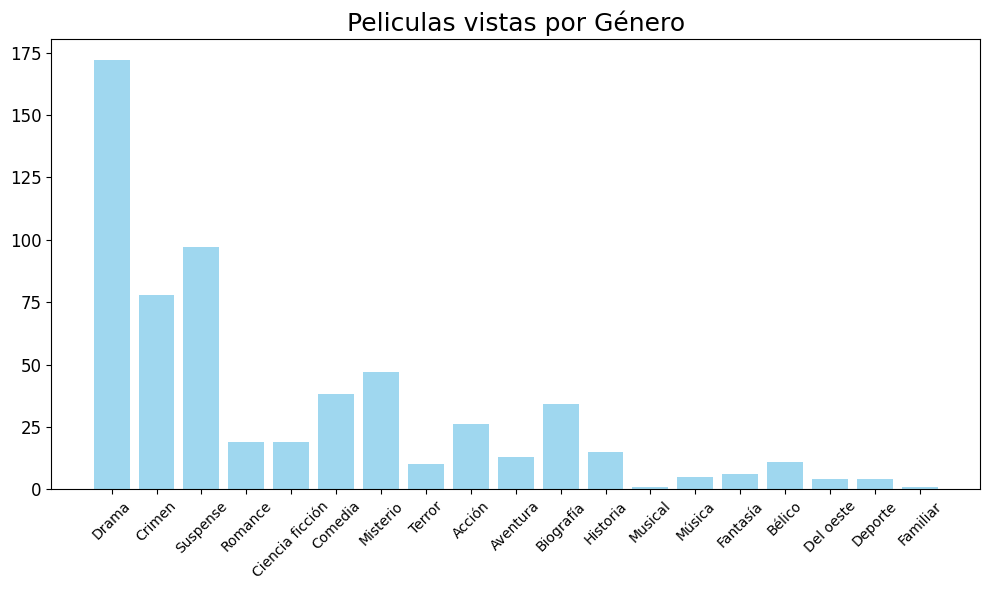

In [91]:
#Numero de peliculas que he visto por genero, primero ddiccionario luego grafico
generos_cantidad = {}
for fila in mis_calificaciones["Genres"]:
    for genero in fila.split(", "): 
        if genero not in generos_cantidad:  
            generos_cantidad[genero] = 0
        generos_cantidad[genero] += 1

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(generos_cantidad.keys(), generos_cantidad.values(), color="skyblue", alpha=0.8)
plt.title("Peliculas vistas por Género",fontdict={"fontsize":18})
plt.xticks(rotation=45)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("../img/misvalor_cantidad_titulos_por_genero.png", bbox_inches="tight")
plt.show()

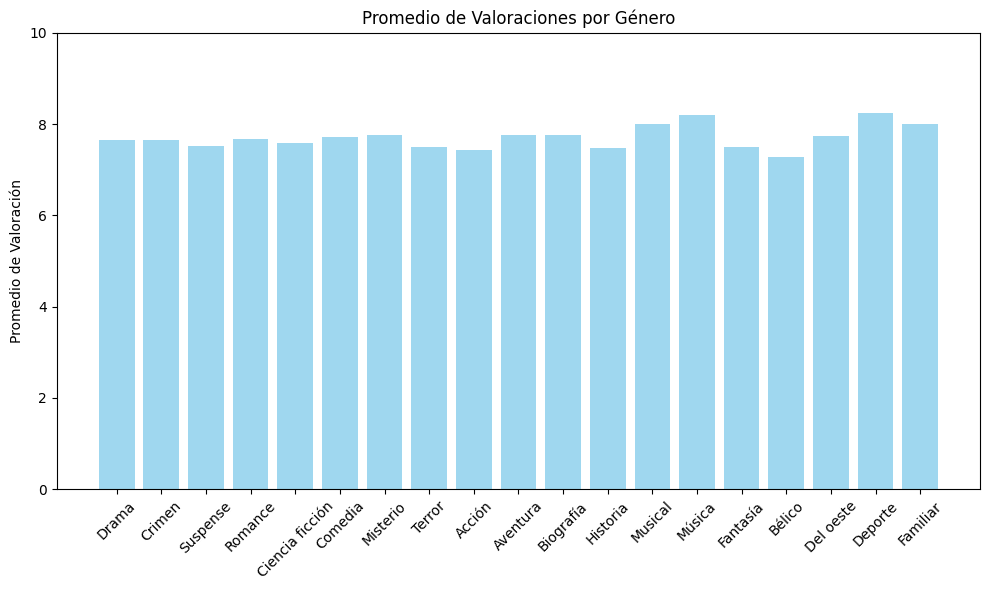

In [41]:
# Calcular el promedio de mis valoraciones por género de pelicula, que genero me gusta mas. (NO SALE NADA RELEVANTE)
valoraciones_por_genero = {}
for i, fila in enumerate(mis_calificaciones["Genres"]):
    for genero in fila.split(", "):  
        if genero not in valoraciones_por_genero:
            valoraciones_por_genero[genero] = []
        valoraciones_por_genero[genero].append(mis_calificaciones["Your Rating"].iloc[i])  

promedios_generos = {}
for genero, ratings in valoraciones_por_genero.items():
    promedio = sum(ratings) / len(ratings)
    promedios_generos[genero] = promedio

plt.figure(figsize=(10, 6))
plt.bar(promedios_generos.keys(), promedios_generos.values(), color="skyblue", alpha=0.8)
plt.title("Promedio de Valoraciones por Género")
plt.ylabel("Promedio de Valoración")
plt.ylim(0, 10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("../img/misvalor_promedio_valoraciones_por_genero.png", bbox_inches="tight")
plt.show()


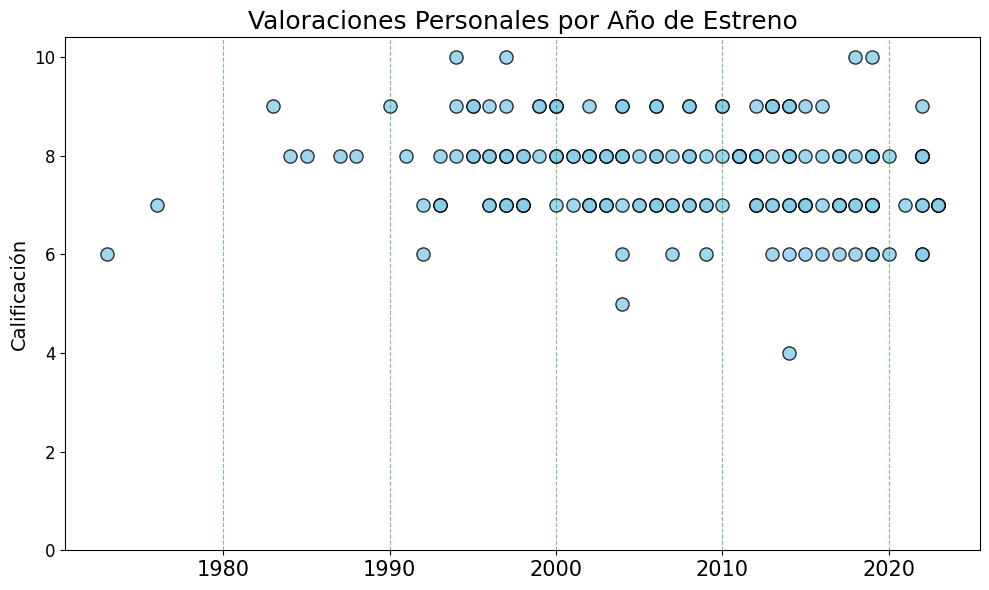

In [97]:
#Scatter multivariable para ver la distribucion en decadas de las peliculas que he visto y como las he valorado.
# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
plt.scatter(
    mis_calificaciones["Year"],
    mis_calificaciones["Your Rating"],
    color="skyblue",
    alpha=0.8,
    edgecolor="black",
    s=90
)
plt.title("Valoraciones Personales por Año de Estreno",fontdict={"fontsize":18})
plt.ylabel("Calificación",fontdict={"fontsize":14})
plt.grid(axis="x", linestyle="--", alpha=0.5,color="green")
plt.xticks(fontsize=15) 
plt.yticks(fontsize=12)
plt.ylim(0, 10.4)
plt.tight_layout()
plt.savefig("../img/misvalor_evolucion_valoraciones_por_ano.png", bbox_inches="tight")
plt.show()

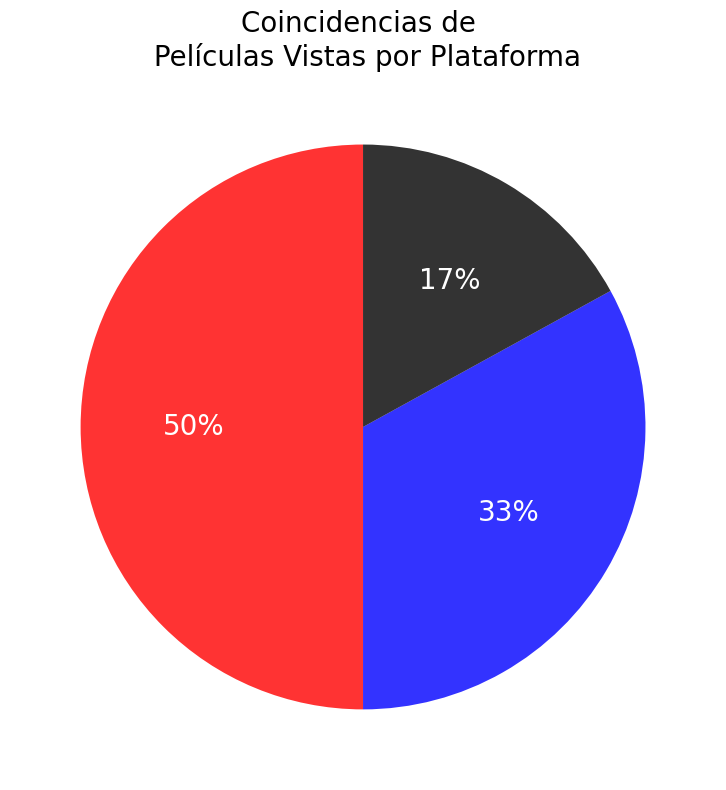

In [43]:
import matplotlib.pyplot as plt

# Calcular coincidencias entre tus títulos y cada plataforma
coincidencias = {}
for plataforma, df_plataforma in {"Netflix": netflix_españa, "Amazon": amazon_españa, "HBO": hbo_españa}.items():
    coincidencias[plataforma] = mis_calificaciones["Original Title"].isin(df_plataforma["title"]).sum()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    coincidencias.values(),
    labels=None,
    autopct="%1.0f%%",  # Mostrar porcentajes con un decimal
    colors=["red", "blue", "black"],
    startangle=90,
    wedgeprops={"alpha": 0.8},
    textprops={'fontsize': 20,"color":"white"}
)
plt.title("Coincidencias de \n Películas Vistas por Plataforma", fontsize=20)
plt.tight_layout()
plt.savefig("../img/misvalor_coincidencias_peliculas_por_plataforma_pie.png", bbox_inches="tight")
plt.show()


In [44]:
plataformas = list(coincidencias.keys())
cantidades = list(coincidencias.values())

df_coincidencias = pd.DataFrame({"Plataforma": plataformas,"Cantidad": cantidades})
print(df_coincidencias["Cantidad"].sum())
df_coincidencias

100


,Plataforma,Cantidad
0,Netflix,50
1,Amazon,33
2,HBO,17


In [93]:
hbo_españa["title"].count()

np.int64(1507)

In [94]:
hbo_españa["imdbAverageRating"].mean()

np.float64(6.892305497598211)